In [70]:
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [71]:
df = pd.read_csv('train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


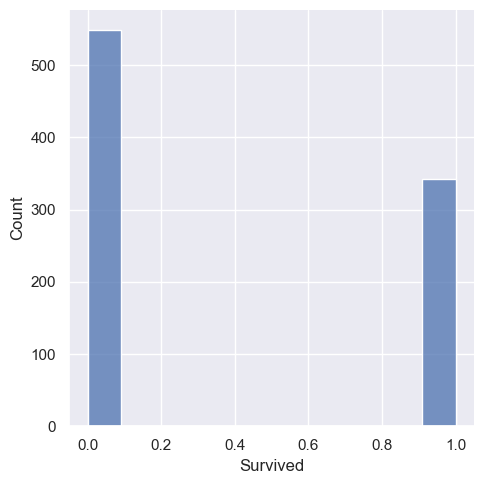

In [72]:
sb.set_theme()
sb.displot(data=df['Survived'], kind='hist').set_titles('Survival count')
plt.show()

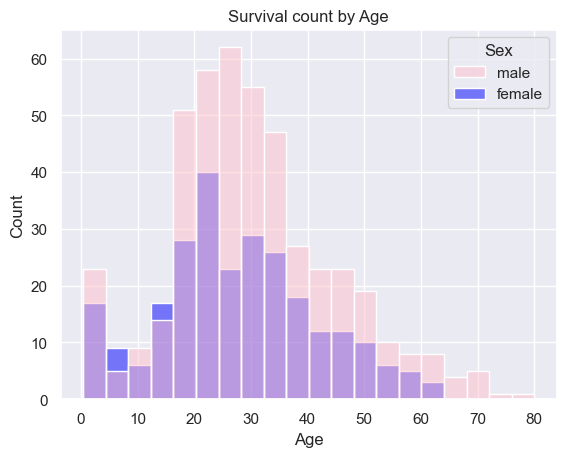

In [73]:
#See if all passengers are either male or female
all(x == 'male' or x == 'female' for x in df['Sex'])

#Show distribution of Survival count by age
sb.histplot(data=df, x='Age', hue='Sex', palette=['pink', 'blue']).set_title('Survival count by Age')
plt.show()